#### Preguntas:
- ¿cómo se distribuyen los SI/NO en variables ofv - vs?
- ¿hay variables vs y ofv **completamente** NO?


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [27]:
dataset_dir = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), 'datasets')
llamados= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_v2.xlsx'))

In [12]:
llamados.head()

,llamado_fecha_hora,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id,llamante_edad,llamante_genero,llamante_vinculo,caso_judicializado,hecho_lugar,...,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
0,2016-11-19 12:46:38,2016-11-19,12:46:38,Misiones,54.0,30,Femenino,Hospital,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,2016-11-19 13:46:24,2016-11-19,13:46:24,CABA,2.0,<NA>,Femenino,Madre,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO
2,2016-11-19 18:20:08,2016-11-19,18:20:08,Tucumán,90.0,47,Femenino,Víctima,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,2016-11-20 00:05:55,2016-11-20,00:05:55,Santa Fe,82.0,<NA>,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4,2016-11-20 00:05:55,2016-11-20,00:05:55,Santa Fe,82.0,<NA>,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


## Chequear variables vacías

Obtener el value counts de cada variable de violencia (vs y ofv) para ver si hay columnas que sean completamente NO o completamente N/A

In [4]:
llamados.shape

(19143, 53)

In [12]:
# violencia sexual

llamados.columns[14:55]

Index(['vs_violacion_via_vaginal', 'vs_violacion_via_anal',
       'vs_violacion_via_oral', 'vs_tentativa_violacion',
       'vs_tocamiento_sexual', 'vs_intento_tocamiento',
       'vs_Intento_violación_tercera_persona', 'vs_grooming',
       'vs_exhibicionismo', 'vs_amenazas_verbales_contenido_sexual',
       'vs_explotacion_sexual', 'vs_explotacion_sexual_comercial',
       'vs_explotacion_sexual_viajes_turismo',
       'vs_sospecha_trata_personas_fines_sexuales',
       'vs_existencia_facilitador_corrupcion_nnya',
       'vs_obligacion_sacarse_fotos_pornograficas',
       'vs_eyaculacion_partes_cuerpo', 'vs_acoso_sexual',
       'vs_iniciacion_sexual_forzada_inducida',
       'vs_otra_forma_violencia_sexual', 'vs_no_sabe_no_contesta',
       'ofv_sentimiento_amenaza', 'ofv_amenaza_explicita',
       'ofv_violencia_fisica', 'ofv_intento_ahorcar', 'ofv_intento_quemar',
       'ofv_intento_ahogar', 'ofv_amenaza_muerte',
       'ofv_uso_sustancias_psicoactivas', 'ofv_intento_privacion_l

In [16]:
# otras formas de violencia

llamados.columns[35:]

Index(['ofv_sentimiento_amenaza', 'ofv_amenaza_explicita',
       'ofv_violencia_fisica', 'ofv_intento_ahorcar', 'ofv_intento_quemar',
       'ofv_intento_ahogar', 'ofv_amenaza_muerte',
       'ofv_uso_sustancias_psicoactivas', 'ofv_intento_privacion_libertad',
       'ofv_privacion_libertad', 'ofv_uso_arma_blanca', 'ofv_uso_arma_fuego',
       'ofv_enganio_seduccion', 'ofv_intento_matar',
       'ofv_uso_animal_victimizar', 'ofv_grooming', 'ofv_otra_forma_violencia',
       'ofv_no_sabe_no_contesta'],
      dtype='object')

### Cantidad de SI/NO en las columnas de violencia

In [20]:
columnas_pocos_si = []
for i in llamados:
    if (llamados[i]== 'SI').sum() < 191:
        columnas_pocos_si.append(i)
    
vs = list(llamados.loc[:, llamados.columns.str.startswith('vs')].columns)
ofv = list(llamados.loc[:, llamados.columns.str.startswith('ofv')].columns)

In [22]:
vs_pocos_si= []
ofv_pocos_si= []
for i in vs:
    if i in columnas_pocos_si:
        vs_pocos_si.append(i)

for i in ofv:
    if i in columnas_pocos_si:
        ofv_pocos_si.append(i)

In [23]:
ofv_pocos_si

['ofv_intento_ahorcar',
 'ofv_intento_quemar',
 'ofv_intento_ahogar',
 'ofv_amenaza_muerte',
 'ofv_uso_sustancias_psicoactivas',
 'ofv_intento_privacion_libertad',
 'ofv_privacion_libertad',
 'ofv_uso_arma_blanca',
 'ofv_uso_arma_fuego',
 'ofv_intento_matar',
 'ofv_uso_animal_victimizar']

In [24]:
vs_pocos_si

['vs_Intento_violación_tercera_persona',
 'vs_amenazas_verbales_contenido_sexual',
 'vs_explotacion_sexual_comercial',
 'vs_explotacion_sexual_viajes_turismo',
 'vs_sospecha_trata_personas_fines_sexuales',
 'vs_existencia_facilitador_corrupcion_nnya',
 'vs_eyaculacion_partes_cuerpo']

In [25]:
191/19143*100

0.9977537481063574

### Contabilizar y graficar vs y ofv

In [65]:
llamados.columns

Index(['llamado_fecha_hora', 'llamado_provincia', 'llamante_edad',
       'llamante_genero', 'llamante_vinculo', 'caso_judicializado',
       'hecho_lugar', 'victima_a_resguardo', 'victima_edad', 'victima_genero',
       'victima_nacionalidad', 'victima_vinculo_agresor',
       'victima_discapacidad', 'victima_convive_agresor',
       'vs_violacion_via_vaginal', 'vs_violacion_via_anal',
       'vs_violacion_via_oral', 'vs_tentativa_violacion',
       'vs_tocamiento_sexual', 'vs_intento_tocamiento',
       'vs_Intento_violación_tercera_persona', 'vs_grooming',
       'vs_exhibicionismo', 'vs_amenazas_verbales_contenido_sexual',
       'vs_explotacion_sexual', 'vs_explotacion_sexual_comercial',
       'vs_explotacion_sexual_viajes_turismo',
       'vs_sospecha_trata_personas_fines_sexuales',
       'vs_existencia_facilitador_corrupcion_nnya',
       'vs_obligacion_sacarse_fotos_pornograficas',
       'vs_eyaculacion_partes_cuerpo', 'vs_acoso_sexual',
       'vs_iniciacion_sexual_forzada_

In [70]:
vs_val_count = llamados.iloc[:,14:35].apply(pd.Series.value_counts)
ofv_val_count = llamados.iloc[:,35:].apply(pd.Series.value_counts)

In [69]:
vs_val_count

,vs_violacion_via_vaginal,vs_violacion_via_anal,vs_violacion_via_oral,vs_tentativa_violacion,vs_tocamiento_sexual,vs_intento_tocamiento,vs_Intento_violación_tercera_persona,vs_grooming,vs_exhibicionismo,vs_amenazas_verbales_contenido_sexual,...,vs_explotacion_sexual_comercial,vs_explotacion_sexual_viajes_turismo,vs_sospecha_trata_personas_fines_sexuales,vs_existencia_facilitador_corrupcion_nnya,vs_obligacion_sacarse_fotos_pornograficas,vs_eyaculacion_partes_cuerpo,vs_acoso_sexual,vs_iniciacion_sexual_forzada_inducida,vs_otra_forma_violencia_sexual,vs_no_sabe_no_contesta
NO,16910,18485,18586,18861,12675,18658,19122,17230,18722,18998,...,19043,19139,19116,19110,18564,19081,18620,18558,17611,12978
SI,2233,658,557,282,6468,485,21,1913,421,145,...,100,4,27,33,579,62,523,585,1532,6165


In [71]:
ofv_val_count

,ofv_sentimiento_amenaza,ofv_amenaza_explicita,ofv_violencia_fisica,ofv_intento_ahorcar,ofv_intento_quemar,ofv_intento_ahogar,ofv_amenaza_muerte,ofv_uso_sustancias_psicoactivas,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
NO,13396,17563,18579,19133,19141,19141,19059,18987,19106,19051,19112,19120,18880,19141,19137,18835,17802,8211
SI,5747,1580,564,10,2,2,84,156,37,92,31,23,263,2,6,308,1341,10932


In [72]:
# categoría as variable

vs_val_count = vs_val_count.reset_index()
vs_val_count.rename(columns = {'index':'categoria'}, inplace = True)
vs_val_count

,categoria,vs_violacion_via_vaginal,vs_violacion_via_anal,vs_violacion_via_oral,vs_tentativa_violacion,vs_tocamiento_sexual,vs_intento_tocamiento,vs_Intento_violación_tercera_persona,vs_grooming,vs_exhibicionismo,...,vs_explotacion_sexual_comercial,vs_explotacion_sexual_viajes_turismo,vs_sospecha_trata_personas_fines_sexuales,vs_existencia_facilitador_corrupcion_nnya,vs_obligacion_sacarse_fotos_pornograficas,vs_eyaculacion_partes_cuerpo,vs_acoso_sexual,vs_iniciacion_sexual_forzada_inducida,vs_otra_forma_violencia_sexual,vs_no_sabe_no_contesta
0,NO,16910,18485,18586,18861,12675,18658,19122,17230,18722,...,19043,19139,19116,19110,18564,19081,18620,18558,17611,12978
1,SI,2233,658,557,282,6468,485,21,1913,421,...,100,4,27,33,579,62,523,585,1532,6165


In [8]:
vs_val_count.to_excel("vs_val_count.xlsx", index=False)

In [73]:
# categoría as variable

ofv_val_count = ofv_val_count.reset_index()
ofv_val_count.rename(columns = {'index':'categoria'}, inplace = True)
ofv_val_count

,categoria,ofv_sentimiento_amenaza,ofv_amenaza_explicita,ofv_violencia_fisica,ofv_intento_ahorcar,ofv_intento_quemar,ofv_intento_ahogar,ofv_amenaza_muerte,ofv_uso_sustancias_psicoactivas,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
0,NO,13396,17563,18579,19133,19141,19141,19059,18987,19106,19051,19112,19120,18880,19141,19137,18835,17802,8211
1,SI,5747,1580,564,10,2,2,84,156,37,92,31,23,263,2,6,308,1341,10932


In [10]:
ofv_val_count.to_excel("ofv_val_count.xlsx", index=False)

In [74]:
vs_wide_to_long = vs_val_count.melt('categoria', var_name='columnas', value_name='valor')
vs_wide_to_long

,categoria,columnas,valor
0,NO,vs_violacion_via_vaginal,16910
1,SI,vs_violacion_via_vaginal,2233
2,NO,vs_violacion_via_anal,18485
3,SI,vs_violacion_via_anal,658
4,NO,vs_violacion_via_oral,18586
5,SI,vs_violacion_via_oral,557
6,NO,vs_tentativa_violacion,18861
7,SI,vs_tentativa_violacion,282
8,NO,vs_tocamiento_sexual,12675
9,SI,vs_tocamiento_sexual,6468


In [13]:
vs_wide_to_long.to_excel("vs_val_count.xlsx", index=False)

In [75]:
#df.sort(['name_sort','A','B'], ascending=[1,1,0])

vs_wide_to_long_sort = vs_wide_to_long.sort_values(['valor'], ascending=False)
#vs_wide_to_long_sort

In [76]:
ofv_wide_to_long = ofv_val_count.melt('categoria', var_name='columnas', value_name='valor')
ofv_wide_to_long.head()

,categoria,columnas,valor
0,NO,ofv_sentimiento_amenaza,13396
1,SI,ofv_sentimiento_amenaza,5747
2,NO,ofv_amenaza_explicita,17563
3,SI,ofv_amenaza_explicita,1580
4,NO,ofv_violencia_fisica,18579


In [15]:
ofv_wide_to_long.to_excel("ofv_val_count.xlsx", index=False)

In [77]:
ofv_wide_to_long_sort = ofv_wide_to_long.sort_values(['valor'], ascending=False)
ofv_wide_to_long_sort.head()

,categoria,columnas,valor
8,NO,ofv_intento_quemar,19141
26,NO,ofv_intento_matar,19141
10,NO,ofv_intento_ahogar,19141
28,NO,ofv_uso_animal_victimizar,19137
6,NO,ofv_intento_ahorcar,19133


/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_4902/1208481782.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], size=10)


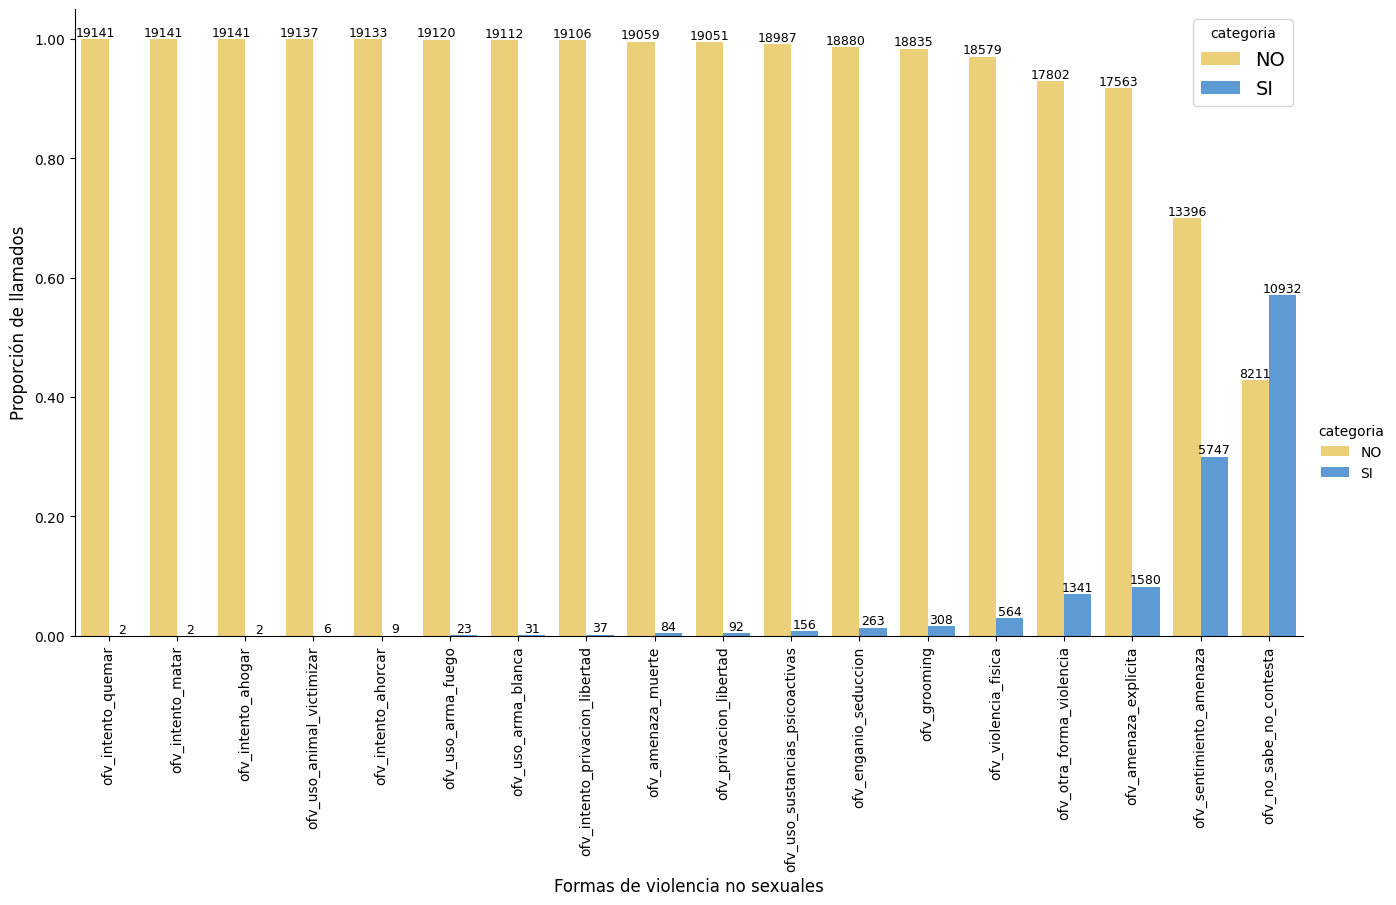

In [78]:
# Calculate total calls for each "columna"
total_calls = ofv_wide_to_long_sort.groupby('columnas')['valor'].sum()

# Create a new column in the DataFrame with the proportions
ofv_wide_to_long_sort['proportion'] = ofv_wide_to_long_sort.apply(
    lambda row: row['valor'] / total_calls[row['columnas']], axis=1
)

# Create the catplot using proportions
vs = sns.catplot(
    x="columnas", y="proportion", hue="categoria", kind="bar",
    data=ofv_wide_to_long_sort, height=7, aspect=15/8,
    palette=palette_sino_desat
)

# Rotate x-axis labels and set font size
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize=10)

# Extract the matplotlib axes_subplot objects from the FacetGrid
ax = vs.facet_axis(0, 0)

# Iterate through the axes containers to add bar labels with actual counts
for c in ax.containers:
    # Get the original counts for the labels
    labels = [int(v.get_height() * total_calls.get(col.get_text(), 0)) for v, col in zip(c, ax.get_xticklabels())]
    ax.bar_label(c, labels=labels, label_type='edge', fontsize=9)  # Increase bar label font size

# Set y-axis tick label font size
ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], size=10)

# Set axis labels with larger font size
ax.set_xlabel("Formas de violencia no sexuales", fontsize=12)  # Increase x-axis label font size
ax.set_ylabel("Proporción de llamados", fontsize=12)  # Increase y-axis label font size

# Add a custom legend with an increased font size
ax.legend(fontsize=14, title='categoria')  # Adjust legend font size

# Show the plot
plt.show(vs)

# Save the plot to a file
vs.figure.savefig("vs_catplot_normalized.png")

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_4902/2676636836.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], size=10)


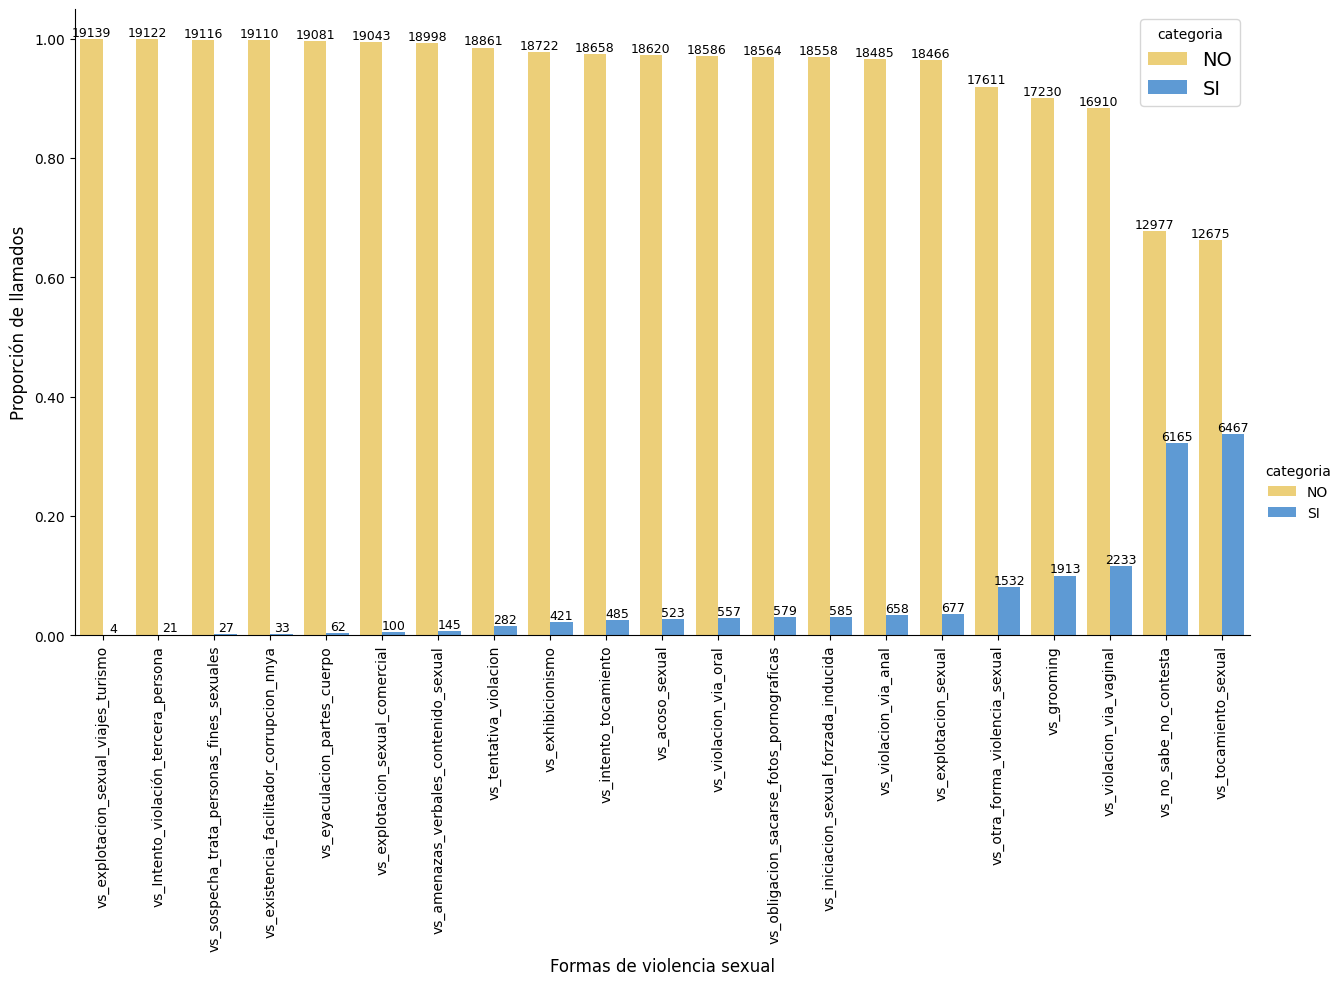

In [79]:


# Calculate total calls for each "columna"
total_calls = vs_wide_to_long_sort.groupby('columnas')['valor'].sum()

# Create a new column in the DataFrame with the proportions
vs_wide_to_long_sort['proportion'] = vs_wide_to_long_sort.apply(
    lambda row: row['valor'] / total_calls[row['columnas']], axis=1
)

# Create the catplot using proportions
vs = sns.catplot(
    x="columnas", y="proportion", hue="categoria", kind="bar",
    data=vs_wide_to_long_sort, height=7, aspect=15/8,
    palette=palette_sino_desat
)

# Rotate x-axis labels and set font size
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize=10)

# Extract the matplotlib axes_subplot objects from the FacetGrid
ax = vs.facet_axis(0, 0)

# Iterate through the axes containers to add bar labels with actual counts
for c in ax.containers:
    # Get the original counts for the labels
    labels = [int(v.get_height() * total_calls.get(col.get_text(), 0)) for v, col in zip(c, ax.get_xticklabels())]
    ax.bar_label(c, labels=labels, label_type='edge', fontsize=9)  # Increase bar label font size

# Set y-axis tick label font size
ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], size=10)

# Set axis labels with larger font size
ax.set_xlabel("Formas de violencia sexual", fontsize=12)  # Increase x-axis label font size
ax.set_ylabel("Proporción de llamados", fontsize=12)  # Increase y-axis label font size

# Add a custom legend with an increased font size
ax.legend(fontsize=14, title='categoria')  # Adjust legend font size

# Show the plot
plt.show(vs)

# Save the plot to a file
vs.figure.savefig("vs_catplot_normalized.png")

